In [1]:
import torch

### loss

In [ ]:
# adversarial_loss(input, target) = -1/n * (target * log(input) + (1 - target) * log(1 - input))
# 二元交叉熵
adversarial_loss = torch.nn.BCELoss()

$$
\text{BCELoss}(x, y) = - \left( y \cdot \log(x) + (1 - y) \cdot \log(1 - x) \right) \\
= - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(x_i) + (1 - y_i) \cdot \log(1 - x_i) \right)
$$

In [ ]:
import torch
import torch.nn as nn

# 创建 BCELoss 对象
criterion = nn.BCELoss()

# 模拟预测值和目标值
# 预测值通常是通过 sigmoid 激活函数输出的概率值
predictions = torch.tensor([0.9, 0.2, 0.8, 0.4], dtype=torch.float32)
# 目标值为 0 或 1
targets = torch.tensor([1.0, 0.0, 1.0, 0.0], dtype=torch.float32)

# 计算 BCELoss
loss = criterion(predictions, targets)

print(f"BCELoss: {loss.item()}")

def custom_bce_loss(predictions, targets):
    epsilon = 1e-12 # 防止 log(0) 的情况发生
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    bce = - targets * torch.log(predictions) - (1. - targets) * torch.log(1. - predictions)
    return torch.mean(bce)

# 计算自定义 BCELoss
custom_loss = custom_bce_loss(predictions, targets)
print(f"Custom BCELoss: {custom_loss.item()}")

BCELoss: 0.26561832427978516
Custom BCELoss: 0.26561829447746277


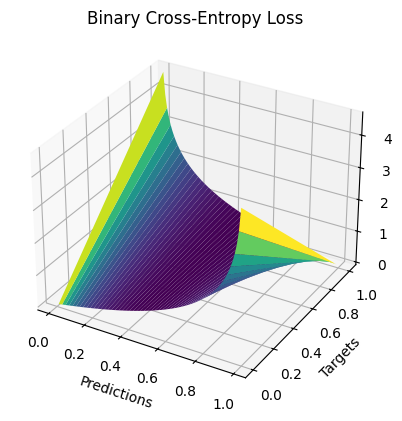

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建 BCELoss 对象
criterion = nn.BCELoss()

# 自定义 BCELoss 计算函数
def custom_bce_loss(predictions, targets):
    epsilon = 1e-12  # 防止 log(0) 的情况发生
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    bce = - targets * torch.log(predictions) - (1. - targets) * torch.log(1. - predictions)
    return bce

# 创建预测值和目标值的网格
preds = np.linspace(0.01, 0.99, 100)  # 避免 log(0)
targets = np.linspace(0, 1, 2)  # 目标值为 0 或 1

# 创建网格
P, T = np.meshgrid(preds, targets)

# 计算损失值
loss_values = np.zeros_like(P)
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        loss_values[i, j] = custom_bce_loss(torch.tensor(P[i, j]), torch.tensor(T[i, j])).item()

# 绘制三维图像
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P, T, loss_values, cmap='viridis')

ax.set_xlabel('Predictions')
ax.set_ylabel('Targets')
ax.set_zlabel('BCELoss')
ax.set_title('Binary Cross-Entropy Loss')

plt.show()